<a href="https://colab.research.google.com/github/Leandrosamorim/AT-C-/blob/master/Projeto_TP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalação do Spark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!apt-get install unzip
!wget -q https://dlcdn.apache.org/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz
!tar xf spark-3.4.0-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version


import pyspark
import random

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Spark_SQL") \
    .getOrCreate()

print("Initialization successful")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=92f491189f8de49946f8343fa3665fe84a858f6cf5501de31b46c5a29e49a2e8
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_382"
OpenJDK Runtime Environment (build 1.8.0_382-8u382-ga-1~22.04.1-b05)
OpenJDK 64-Bit Server VM (build 25.382-b05, mixed mode)
Initialization successful


## Verificar o status da seção iniciada

In [ ]:
#Executando apenas a variável sc em uma célula veremos algumas informações sobre a sessão Spark criada.
spark

## Importar um dado externo

In [ ]:

!wget --quiet --show-progress https://filebin.net/eo8odp08q6njajlk/books.zip

books.zip           100%[===================>]   1.63M  1.50MB/s    in 1.1s    


In [ ]:
!unzip -d ./datasets ./books.zip

Archive:  ./books.zip
  inflating: ./datasets/gutenberg.org_cache_epub_11861_pg11861.txt  
  inflating: ./datasets/gutenberg.org_cache_epub_24625_pg24625.txt  
  inflating: ./datasets/gutenberg.org_cache_epub_26777_pg26777.txt  
  inflating: ./datasets/gutenberg.org_cache_epub_29484_pg29484.txt  
  inflating: ./datasets/gutenberg.org_cache_epub_29666_pg29666.txt  
  inflating: ./datasets/gutenberg.org_cache_epub_38677_pg38677.txt  
  inflating: ./datasets/gutenberg.org_cache_epub_39006_pg39006.txt  
  inflating: ./datasets/gutenberg.org_cache_epub_44540_pg44540.txt  
  inflating: ./datasets/gutenberg.org_files_56949_56949-0.txt  
  inflating: ./datasets/gutenberg.org_files_63606_63606-0.txt  


In [ ]:
files = os.listdir("./datasets")
files = [f for f in files if os.path.isfile("./datasets"+'/'+f)]
print(*files, sep="\n")

gutenberg.org_cache_epub_29484_pg29484.txt
gutenberg.org_cache_epub_26777_pg26777.txt
gutenberg.org_cache_epub_38677_pg38677.txt
gutenberg.org_files_63606_63606-0.txt
gutenberg.org_cache_epub_29666_pg29666.txt
gutenberg.org_cache_epub_11861_pg11861.txt
gutenberg.org_cache_epub_44540_pg44540.txt
gutenberg.org_files_56949_56949-0.txt
gutenberg.org_cache_epub_39006_pg39006.txt
gutenberg.org_cache_epub_24625_pg24625.txt


## Carregar o dado em um dataframe

In [ ]:
dfs = {}
for file in files:
  dfs[file[:-4]] = spark.read.text(f"./datasets/{file}")

In [ ]:
#Verificando o tipo de objeto criado
type(dfs['gutenberg.org_cache_epub_26777_pg26777'])

pyspark.sql.dataframe.DataFrame

In [ ]:
# Espiando o dataset
dfs['gutenberg.org_cache_epub_29484_pg29484'].show()

+--------------------+
|               value|
+--------------------+
|The Project Guten...|
|                    |
|This ebook is for...|
|most other parts ...|
|whatsoever. You m...|
|of the Project Gu...|
|at www.gutenberg....|
|you will have to ...|
|before using this...|
|                    |
|Title: A Revoluçã...|
|                    |
|                    |
|Author: Francisco...|
|                    |
|Release date: Jul...|
|                    |
|Language: Portuguese|
|                    |
|Original publicat...|
+--------------------+
only showing top 20 rows



In [ ]:
dfs['gutenberg.org_cache_epub_29484_pg29484'].createOrReplaceTempView("book1")
dfs['gutenberg.org_cache_epub_26777_pg26777'].createOrReplaceTempView("book2")
dfs['gutenberg.org_cache_epub_38677_pg38677'].createOrReplaceTempView("book3")
dfs['gutenberg.org_files_63606_63606-0'].createOrReplaceTempView("book4")
dfs['gutenberg.org_cache_epub_29666_pg29666'].createOrReplaceTempView("book5")
dfs['gutenberg.org_cache_epub_11861_pg11861'].createOrReplaceTempView("book6")
dfs['gutenberg.org_cache_epub_44540_pg44540'].createOrReplaceTempView("book7")
dfs['gutenberg.org_files_56949_56949-0'].createOrReplaceTempView("book8")
dfs['gutenberg.org_cache_epub_39006_pg39006'].createOrReplaceTempView("book9")
dfs['gutenberg.org_cache_epub_24625_pg24625'].createOrReplaceTempView("book10")


In [ ]:
### REMOVENDO CARACTERES DESCARTAVEIS
from pyspark.sql.functions import regexp_replace
undesiredChars = "[^a-zA-Z0-9\\s]+"

dfs['gutenberg.org_cache_epub_29484_pg29484'].withColumn("cleaned_text", regexp_replace("value", undesiredChars, "")).show()


+--------------------+--------------------+
|               value|        cleaned_text|
+--------------------+--------------------+
|The Project Guten...|The Project Guten...|
|                    |                    |
|This ebook is for...|This ebook is for...|
|most other parts ...|most other parts ...|
|whatsoever. You m...|whatsoever You ma...|
|of the Project Gu...|of the Project Gu...|
|at www.gutenberg....|at wwwgutenbergor...|
|you will have to ...|you will have to ...|
|before using this...|before using this...|
|                    |                    |
|Title: A Revoluçã...|Title A Revoluo P...|
|                    |                    |
|                    |                    |
|Author: Francisco...|Author Francisco ...|
|                    |                    |
|Release date: Jul...|Release date July...|
|                    |                    |
|Language: Portuguese| Language Portuguese|
|                    |                    |
|Original publicat...|Original p

In [ ]:
### REMOVENDO LINHAS DESCARTAVEIS
dfs['gutenberg.org_cache_epub_29484_pg29484'].filter(dfs['gutenberg.org_cache_epub_29484_pg29484']["value"] != "").show()

+--------------------+
|               value|
+--------------------+
|The Project Guten...|
|                    |
|This ebook is for...|
|most other parts ...|
|whatsoever. You m...|
|of the Project Gu...|
|at www.gutenberg....|
|you will have to ...|
|before using this...|
|Title: A Revoluçã...|
|Author: Francisco...|
|Release date: Jul...|
|Language: Portuguese|
|Original publicat...|
|Credits: Produced...|
|*** START OF THE ...|
|Produced by Pedro...|
|Proofreading Team...|
|                 ...|
|                 ...|
+--------------------+
only showing top 20 rows



In [ ]:
### REMOVENDO STOPWORDSf
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover(inputCol="value", outputCol="filtered")
remover.transform(dfs['gutenberg.org_cache_epub_26777_pg26777']).head()

IllegalArgumentException: ignored

In [ ]:
### LEMATIZAÇÃO
import nltk

from nltk.stem import WordNetLemmatizer
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

lemmatize_udf = udf(lemmatize_text, StringType())

lemmatized = dfs['gutenberg.org_cache_epub_26777_pg26777'].withColumn("lemmatized_text", lemmatize_udf(dfs['gutenberg.org_cache_epub_26777_pg26777']["value"]))
lemmatized.show()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


+--------------------+--------------------+
|               value|     lemmatized_text|
+--------------------+--------------------+
|The Project Guten...|The Project Guten...|
|                    |                    |
|This ebook is for...|This ebook is for...|
|most other parts ...|most other part o...|
|whatsoever. You m...|whatsoever. You m...|
|of the Project Gu...|of the Project Gu...|
|at www.gutenberg....|at www.gutenberg....|
|you will have to ...|you will have to ...|
|before using this...|before using this...|
|                    |                    |
|Title: A Revoluçã...|Title: A Revoluçã...|
|                    |                    |
|                    |                    |
|Author: Francisco...|Author: Francisco...|
|                    |                    |
|Release date: Oct...|Release date: Oct...|
|                M...|Most recently upd...|
|                    |                    |
|Language: Portuguese|Language: Portuguese|
|                    |          

In [ ]:
topPoleWinner = spark.sql('''
select d.surname, count(d.surname) as t
from drivers d
inner join qualifying q on q.driverId = d.driverId
inner join results r on r.driverId = d.driverId and r.raceId = q.raceId
where r.position = 1 and q.position = 1
group by d.surname
order by t desc
limit 1
'''
)
topPoleWinner.show()

+--------+---+
| surname|  t|
+--------+---+
|Hamilton| 39|
+--------+---+



In [ ]:
noPodiumDrivers = spark.sql('''
SELECT d.driverId, d.surname, SUM(r.points) AS total_points
FROM drivers d
LEFT JOIN results r ON d.driverId = r.driverId
WHERE d.driverId NOT IN (
    SELECT r.driverId
    FROM results r
    WHERE r.position <= 3
)
GROUP BY d.driverId, d.surname
ORDER BY total_points DESC
LIMIT 1;
'''
)
noPodiumDrivers.show(500)

+--------+-----------+------------+
|driverId|    surname|total_points|
+--------+-----------+------------+
|     807|H�_lkenberg|       405.0|
+--------+-----------+------------+



## Verificar o schema do dataset

In [ ]:
# Verificando o schema() deste sparkdataframe
df_spark.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: string (nullable = true)
 |-- minimum_nights: string (nullable = true)
 |-- number_of_reviews: string (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: string (nullable = true)
 |-- calculated_host_listings_count: string (nullable = true)
 |-- availability_365: string (nullable = true)
 |-- number_of_reviews_ltm: double (nullable = true)
 |-- license: integer (nullable = true)



## Pré-processamento dos dados (caso precise)

In [ ]:
#Transformando o atributo number_of_reviews em numerico
df_spark = df_spark.withColumn("number_of_reviews",df_spark.number_of_reviews.cast('int'))

#Transformando o atributo price em numerico
df_spark = df_spark.withColumn("price",df_spark.price.cast('int'))

#Verificando a transformação
df_spark.select('number_of_reviews').printSchema()
df_spark.select('price').printSchema()

root
 |-- number_of_reviews: integer (nullable = true)

root
 |-- price: integer (nullable = true)



In [ ]:
#Importa as funções SQL
from pyspark.sql import functions as F
from pyspark.sql.functions import *

#Realizando uma limpeza no dataframe
df_spark_clean = df_spark.filter(~F.col('neighbourhood').contains('2'))
dropDisDF_clean = df_spark_clean.dropDuplicates(["neighbourhood"]).select("neighbourhood")
dropDisDF_clean.show(truncate=False)

+-------------------+
|neighbourhood      |
+-------------------+
|Cocotá             |
|Gávea              |
|Tomás Coelho       |
|Ipanema            |
|Realengo           |
|Gardênia Azul      |
|Rocha              |
|Bento Ribeiro      |
|Vicente de Carvalho|
|Manguinhos         |
|Leme               |
|Jacarepaguá        |
|Botafogo           |
|Campo Grande       |
|Rocinha            |
|Grumari            |
|Padre Miguel       |
|Flamengo           |
|Santo Cristo       |
|Engenho da Rainha  |
+-------------------+
only showing top 20 rows



## Realizar uma análise dos dados com queries em SQL

In [ ]:
df_spark.show()

+------+--------------------+-------+--------------------+-------------------+---------------+----------+----------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+---------------------+-------+
|    id|                name|host_id|           host_name|neighbourhood_group|  neighbourhood|  latitude| longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|number_of_reviews_ltm|license|
+------+--------------------+-------+--------------------+-------------------+---------------+----------+----------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+---------------------+-------+
| 17878|Very Nice 2Br in ...|  68997|            Matthias|               null|     Copacabana| -22.96599|  -43.1794|Entire home/apt|  350|             5|       

In [ ]:
#Salvando o DataFrame como uma visualização temporária do SQL
df_spark.createOrReplaceTempView("airbnb")

In [ ]:
#Realizando análise utilizando SQL
top10_reviews = spark.sql('''
            SELECT neighbourhood, sum(number_of_reviews) as total_reviews
            FROM airbnb
            GROUP BY neighbourhood
            ORDER BY total_reviews DESC
            LIMIT 10
            '''
            )
top10_reviews.show()

+--------------------+-------------+
|       neighbourhood|total_reviews|
+--------------------+-------------+
|          Copacabana|       215700|
|             Ipanema|        80063|
|     Barra da Tijuca|        48023|
|              Leblon|        33750|
|            Botafogo|        23499|
|              Centro|        20007|
|        Santa Teresa|        19064|
|Recreio dos Bande...|        17189|
|         Jacarepaguá|        15272|
|                Leme|        10566|
+--------------------+-------------+



In [ ]:
#Realizando outra análise utilizando SQL
top10_avg_price = spark.sql('''
            SELECT neighbourhood, ROUND(avg(price),2) as avg_price
            FROM airbnb
            GROUP BY neighbourhood
            ORDER BY avg_price DESC
            LIMIT 10
            '''
            )
top10_avg_price.show()

+---------------+---------+
|  neighbourhood|avg_price|
+---------------+---------+
|        Estácio|  9313.87|
|  São Cristóvão|  7329.21|
|     Bonsucesso|  6429.25|
|            Joá|  5953.86|
|    São Conrado|   2330.0|
|       Anchieta|  1921.33|
|Jardim Botânico|  1804.97|
|           Urca|  1698.71|
|      Itanhangá|  1542.11|
|       Curicica|  1493.77|
+---------------+---------+



## Crie dois gráficos para demonstrar os insighs

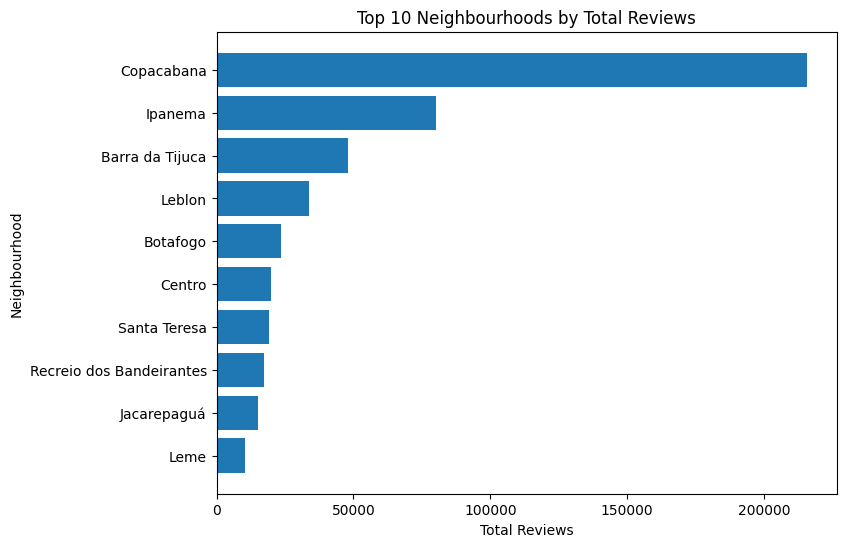

In [ ]:
##Criar o primeiro gráficos para demonstrar os insighs
import matplotlib.pyplot as plt
import pandas as pd

#Converter o resultado em um DataFrame pandas
df = top10_reviews.toPandas()

#Criar o gráfico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(df['neighbourhood'], df['total_reviews'])
plt.xlabel('Total Reviews')
plt.ylabel('Neighbourhood')
plt.title('Top 10 Neighbourhoods by Total Reviews')
plt.gca().invert_yaxis()

# Exibir o gráfico
plt.show()

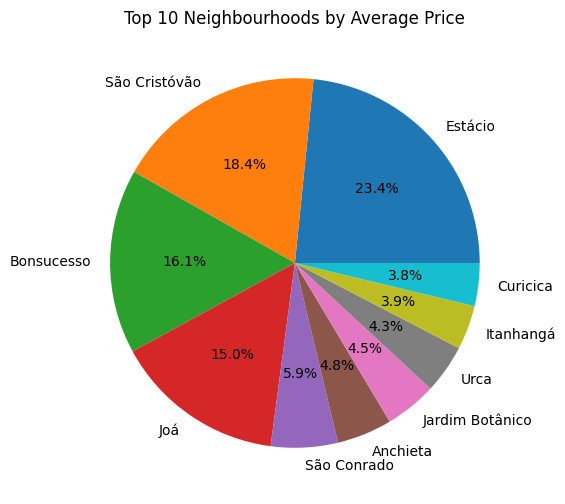

In [ ]:
##Criar o segundo gráfico para demonstrar os insighs
df = top10_avg_price.toPandas()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(df['avg_price'], labels=df['neighbourhood'], autopct='%1.1f%%')
plt.title('Top 10 Neighbourhoods by Average Price')

# Exibir o gráfico
plt.show()

## A partir da análise dos dados, escreva dois insights obtidos. Utilize os gráficos que você criou para ajudar a explicar o que você encontrou de interessante.